## Machine Learning for Neuroscience, <br>Department of Brain Sciences, Faculty of Medicine, <br> Imperial College London
### Contributors: Francesca Palermo, Nan Fletcher-Lloyd, Alex Capstick, Yu Chen
**Winter 2022**


# Machine Learning for Beginners

This tutorial will provide an introduction to machine learning using the machine learning library for Python scikit-learn (https://scikit-learn.org/stable).

scikit-learn features various machine learning algorithms and can also be used for dimensionality reduction (reducing the number of random variables to consider), model selection, and pre-processing of data.

## Import scikit-learn

In [1]:
import sklearn as sk

## Types of Machine Learning

There are many types of machine learning. 

There are three main types of machine learning. These are supervised learning (classification and regression), unsupervised learning (clustering), and reinforcement learning (decision making).

Other types include semi-supervised and self-supervised learning (not discussed in this module).

Deep learning and deep reinforcement learning are further types of machine learning that we will not discuss in this tutorial.

In this tutorial, we will focus on supervised and unsupervised learning examples.

## Examples

First, we must remember to import our other dependencies.

### Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Supervised Learning

Supervised learning uses labelled datasets to train algorithms to identify the category to which an obejct belongs or predict outcomes. 

#### Classification

Classification involves identifying a category to which an object belongs.

For this example, you are going to use the sci-kit learn dataset breast cancer.

More on this dataset can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [3]:
data = datasets.load_breast_cancer(as_frame=True) # this loads the dataset as a dictionary
features = data.data # this derives features as a dataframe (30 features by 569 instances)
labels = data.target # this derives labels as a dataframe (569 instances)

Let's just do a quick check to make sure everything has loaded as it should.

In [4]:
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

*N.B. The labels are binary, with 0 indicating a negative diagnosis and 1 indicating a positive diagnosis of breast cancer, respectively.*

Here, we are going to focus on two features (mean area and mean smoothness), so the first thing we'll do is extract this data.

In [6]:
area_and_smoothness = features[['mean area', 'mean smoothness']]
area_and_smoothness

,mean area,mean smoothness
0,1001.0,0.11840
1,1326.0,0.08474
2,1203.0,0.10960
3,386.1,0.14250
4,1297.0,0.10030
...,...,...
564,1479.0,0.11100
565,1261.0,0.09780
566,858.1,0.08455
567,1265.0,0.11780


For this example, we are going to use logistic regression which, despite its name, is a linear classification model.

Learn more about logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

To use the Logistic Regression classifier, we must first import it using the following line of code:

In [7]:
from sklearn.linear_model import LogisticRegression

But before we starting training our model, we must first scale our feature data.

Feature scaling is one of the most critical pre-processing steps in machine learning, with the most common techniques being standardization and normalization.

Machine learning algorithms that calculate distance or assume normality are sensitive to relative scales of features, meaning that if the data is not scaled, features with a higher value range start dominating the model's decision-making process. Feature scaling is therefore needed to bring features with different ranges into comparable ranges.

Feature scaling also allows for much faster model convergence.

Learn more about scaling (when you need to and why, and how to do so) using the links below:

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35 

https://towardsdatascience.com/feature-scaling-effectively-choose-input-variables-based-on-distributions-3032207c921f

*N.B. scaling will feature in assessed labs later on during this module, so it would definitely be valuable to read through these two articles.*

In this scenario, we are going to use the sci-kit learn StandardScaler to standardize our data.

Learn more about this scaler here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Another commonly used scaler is the MinMax scaler. The MinMax scaler normalizes data. Learn more here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html  

First, let's import out scaler.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Next, let's implement our standardization.

In [9]:
standardized_data = pd.DataFrame(scaler.fit_transform(area_and_smoothness),
                   columns=['mean area','mean smoothness'])
standardized_data

,mean area,mean smoothness
0,0.984375,1.568466
1,1.908708,-0.826962
2,1.558884,0.942210
3,-0.764464,3.283553
4,1.826229,0.280372
...,...,...
564,2.343856,1.041842
565,1.723842,0.102458
566,0.577953,-0.840484
567,1.735218,1.525767


Now we've completed this step, we can move onto training our model. 

As you learned in today's lecture, whenever we are building a machine learning model that uses a supervised learning algorithm, it is important we have some way of evaluating the performance of that model.  However, learning the parameters of the prediction function and testing it on the same data would mean a model would just be repeating the labels of the samples it has just seen, deriving a perfect score, but failing to predict anything useful on as-of-yet unseen data. This situation is known as overfitting, and to avoid it the most common practice is to hold out part of the available data as a test set.

The most simple way to do this is by using a technique called the train-test split on our data. 

You can read more about how and when to use the train-test split at the following links: 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

So let's import out train-test split helper from sklearn and apply it to our data.

In [10]:
from sklearn.model_selection import train_test_split

In this case, we want to have a train_size of 80% and a test size of 20%. 

We also want to shuffle our data before splitting as, without this, we risk creating batch data not representative of the overall dataset.

Finally, we use the random_state parameter to control the shuffling applied to the data before the split to ensure a reproducible output across multiple calls of the function. To apply this, pass any integer. 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(standardized_data, labels, test_size = 0.20, shuffle=True, random_state = 42)

Check that the output of this function is what you might expect (number of instances in the training and test sets).

In [12]:
x_train

,mean area,mean smoothness
68,-1.150124,0.728714
181,1.866047,1.262455
63,-1.120545,-1.362838
248,-0.875668,0.014925
60,-0.975496,1.212639
...,...,...
71,-1.168611,0.104593
106,-0.689379,1.269571
270,-0.063392,-2.282296
435,-0.157532,0.686015


In [13]:
x_test

,mean area,mean smoothness
204,-0.491999,0.234114
70,1.351264,-0.446227
131,0.267377,0.913744
431,-0.532101,0.643316
540,-0.716683,0.247636
...,...,...
486,0.031601,-0.708116
75,0.463051,-0.333074
249,-0.707013,0.351537
238,-0.088136,-1.005588


In [14]:
y_train

68     1
181    0
63     1
248    1
60     1
      ..
71     1
106    1
270    1
435    0
102    1
Name: target, Length: 455, dtype: int64

In [15]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int64

In this case, we then train the model with the following line of code.

In [16]:
model = LogisticRegression(random_state=42).fit(x_train, y_train)

Next, we want to return the mean accuracy on the given test data and labels.

In [17]:
scores = model.score(x_test, y_test) 
scores

0.9298245614035088

Now, accuracy is not the only metric that can be used to evaluate model performance. 

Read more about the different metrics that can be used to evaluate model performance including how to calculate them and when to use them: https://towardsdatascience.com/performance-metrics-for-classification-machine-learning-problems-97e7e774a007

For this, we must first use our model to predict the labels of the test feature data.

In [18]:
pred_labels = model.predict(x_test)

We now want to use these predicted labels to derive a confusion matrix. A confusion matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

TPs are test results that correctly indicate the presence of a condition or characteristic.

TNs are test results that correctly indicate the absence of a condition or characteristic.

FPs are test results that incorrectly indicate the presence of a condition or characteristic.

FNs are test results that incorrectly indicate the absence of a condition or characteristic.

Now let's import the confusion matrix helper function.

In [19]:
from sklearn.metrics import confusion_matrix

We can then print the confusion matrix using the following line of code:

In [20]:
cm = confusion_matrix(y_test, pred_labels)
print(cm)

[[38  5]
 [ 3 68]]


From this confusion matrix, we can then derive further metrics, including precision, recall, and the F1-score.

Precision or specificity is the ratio of correctly classified positive instances to the total predicted positive classifications. 

Recall or sensitivity is the ratio of correctly classified positive instances to the total positive instances.

Precision helps us understand how useful results are; however, recall helps us understand how complete the results are.

The F1-score balances the two previous scores, being the harmonic mean of precision and recall.

*N.B. accuracy is the ratio of correctly classified instances to the total instances.*

First, let's import our helper functions.

In [21]:
from numpy import mean
from numpy import std

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Now, let's print all these scores.

For precision, recall, and the F1-score, you should report the average and standard deviation of these scores. This is because the precision, recall, and F1-score is provided for each class in the dataset.

However, particularly when working with multiclass data, it is important to understand the performance of the model for each class. For this, we print a classification report, which tells you the precision, recall, and F1-score for each class and support (weighted by number of instances in each class in comparison to total number of instances for each class, respectively).

In [23]:
from sklearn.metrics import classification_report

In [24]:
f1 = f1_score(y_test, pred_labels)
recall = recall_score(y_test, pred_labels)
precision = precision_score(y_test, pred_labels)

f1_avg = mean(f1_score(y_test, pred_labels, average=None))
recall_avg = mean(recall_score(y_test, pred_labels, average=None))
precision_avg = mean(precision_score(y_test, pred_labels, average=None))

f1_sd = std(f1_score(y_test, pred_labels, average=None))
recall_sd = std(recall_score(y_test, pred_labels, average=None))
precision_sd = std(precision_score(y_test, pred_labels, average=None))

print('\nf1:\t\t',f1)
print('recall\t\t',recall)
print('precision\t',precision)

print('\nf1_avg:\t\t',f1_avg)
print('recall_avg\t',recall_avg)
print('precision_avg\t',precision_avg)

print('\nf1_sd:\t\t',f1_sd)
print('recall_sd\t',recall_sd)
print('precision_sd\t',precision_sd)

print('\n',classification_report(y_test, pred_labels))


f1:		 0.9444444444444444
recall		 0.9577464788732394
precision	 0.9315068493150684

f1_avg:		 0.9246031746031745
recall_avg	 0.9207337045528987
precision_avg	 0.9291680588038758

f1_sd:		 0.019841269841269882
recall_sd	 0.03701277432034061
precision_sd	 0.0023387905111927343

               precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



Another metric that can be used to evaluate model performance is the area under the receiver operating characteristic curve (ROC-AUC), which plots the true positive rate (recall) against the false positive rate. The AUC ranges in value from 0 to 1. The closer the score to 1, the greater the number of correct predictions.

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
print(roc_auc_score(y_test, pred_labels))

0.9207337045528988


Now, even using a train-test split, there is still a risk of overfitting on the test set when tuning the parameters of a model until the estimator performs optimally. In this scenario, knowledge can leak into the model until th evaluation metrics no longer report on generalization performance. 

One way of solving this is hold yet another aprt of the available dataset out as a so-called validation set, on which an initial evaluation is done. However, the problem with partitioning the available data into three sets is that we drastically reduce the number of samples which can be used for learning the model (a particular issue for small datasets and imbalanced datasets). It also means that the results can depend on any random choice for the pair of train and validation sets.

A solution to this and another way of evaluating model performance is to use cross-validation, which removes the need for a validation set.

In the basic approach, otherwise known as k-fold cross-validation, the data is split into k folds. The model is trained using k - 1 of the folds as training data and validation on the remaining part of the data. This is repeated for each fold. The performance measures reported by k-fold cross-validation is then the average of the values computed in the loop.

Learn more about cross-validation here: https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79 

*N.B the article above includes more information on when it is particularly useful to use cross-validation and the different strategies for doing so.*

For this, we must first import the cross_val_predict helper function. This allows us to fit a model to our data and generate cross-validated estimates for each input data point.

In [27]:
from sklearn.model_selection import cross_val_predict

We then reset the model.

In [28]:
model = LogisticRegression(random_state=42)

And finally, we generate cross-validated estimates for each input data point.

In [29]:
cv_pred_labels = cross_val_predict(model, standardized_data, labels, cv=10) # Here we use a 10-fold cross-validation.

Now all we need to do is output our results as before.

In [30]:
accuracy = accuracy_score(labels, cv_pred_labels)

cm = confusion_matrix(labels, cv_pred_labels)

f1 = f1_score(labels, cv_pred_labels)
recall = recall_score(labels, cv_pred_labels)
precision = precision_score(labels, cv_pred_labels)

f1_avg = mean(f1_score(labels, cv_pred_labels, average=None))
recall_avg = mean(recall_score(labels, cv_pred_labels, average=None))
precision_avg = mean(precision_score(labels, cv_pred_labels, average=None))

f1_sd = std(f1_score(labels, cv_pred_labels, average=None))
recall_sd = std(recall_score(labels, cv_pred_labels, average=None))
precision_sd = std(precision_score(labels, cv_pred_labels, average=None))

print('accuracy:\t', accuracy)

print(cm)

print('\nf1:\t\t',f1)
print('recall\t\t',recall)
print('precision\t',precision)

print('\nf1_avg:\t\t',f1_avg)
print('recall_avg\t',recall_avg)
print('precision_avg\t',precision_avg)

print('\nf1_sd:\t\t',f1_sd)
print('recall_sd\t',recall_sd)
print('precision_sd\t',precision_sd)

print('\n',classification_report(labels, cv_pred_labels))

print(roc_auc_score(labels, cv_pred_labels))

accuracy:	 0.8980667838312829
[[173  39]
 [ 19 338]]

f1:		 0.9209809264305178
recall		 0.9467787114845938
precision	 0.896551724137931

f1_avg:		 0.888708284997437
recall_avg	 0.8814082236668253
precision_avg	 0.8987966954022988

f1_sd:		 0.03227264143308067
recall_sd	 0.06537048781776861
precision_sd	 0.00224497126436779

               precision    recall  f1-score   support

           0       0.90      0.82      0.86       212
           1       0.90      0.95      0.92       357

    accuracy                           0.90       569
   macro avg       0.90      0.88      0.89       569
weighted avg       0.90      0.90      0.90       569

0.8814082236668251


And that's it! You have now learnt all about classification.

#### Regression

Regression involves predicting a continuous-valued attribute associated with an object.

For this example, you are going to use the sci-kit learn dataset diabetes.

More on this dataset can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes 

In [31]:
from sklearn import datasets
data = datasets.load_diabetes(as_frame=True) # this loads the dataset as a dictionary
features = data.data # this derives features as a dataframe (10 features by 442 instances)
labels = data.target # this derives a continuous-valued attribute as a dataframe (442 instances)

Let's just do a quick check to make sure everything has loaded as it should.

In [32]:
features

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [33]:
labels

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

You might think the features dataframe looks a bit odd. This is because each of the 10 feature variables have already been mean centred and scaled by the product of the standard deviation and number of samples (i.e. the sum of squares of each column totals 1) to bring them to a common scale.

First, let's check the linear correlation between variables in the dataframe.

In [34]:
df = pd.concat([features, labels], axis=1)

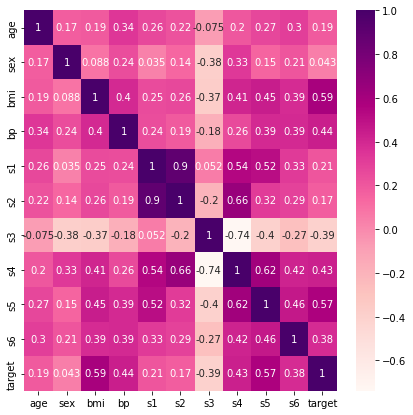

In [35]:
corr = df.corr()

# visualize the correlation matrix

plt.subplots(figsize=(7,7))
sns.heatmap(corr, cmap= 'RdPu', annot=True) # plots correlation matrix as a heatmap with values
plt.show()

This is the point at which multicolinear variables (indepdendent variables that are significantly correlated with one another) can be removed for feature selection, but we are just going to focus on demonstrating the methodology behing regression models.

For now, we are just going to use a simple train-test split to evaluate model performance.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20, shuffle=True, random_state = 42)

For this example, we are going to use linear regression.

Learn more about linear regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Let's import it now!

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Now we want to fit the model using all the feature variables and the dependent variable and use this model to predict values of the dependent variable based on the test feature variables.

In [38]:
model.fit(x_train, y_train)

LinearRegression()

In [39]:
pred_y = model.predict(x_test)

Finally, let's evaluate the model.

To speed things up, we can import metrics from sklearn using the code in the next cell.

Learn more about the different metrics (what they measure and when to use them) here: https://scikit-learn.org/stable/modules/model_evaluation.html 

In [40]:
from sklearn import metrics as mt

We are going to look at three measures:
- the coefficient of determination or R² score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)
- the mean absolute error or MAE (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)
- the mean squared error or MSE (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

The R² score represents the proportion of the variance that has been explained by the independent variables of the model. It provides an indication of goodness of fit, with the best possible score being 1.0.

The MAE computes a risk metric corresponding to the expected value of the absolute error loss.

The MSE computes a risk metric corresponding to the expected value of the squared error or loss. 

In [41]:
print("The R² score of the model is", np.round(mt.r2_score(y_test,pred_y),2))
print("The Mean Absolute Error of model is", np.round(mt.mean_absolute_error(y_test,pred_y),2))
print("The Mean Squared Error of the model is" , np.round(mt.mean_squared_error(y_test,pred_y),2))

The R² score of the model is 0.45
The Mean Absolute Error of model is 42.79
The Mean Squared Error of the model is 2900.19


Finally, we want to determine the coefficients and interecept of the regression equation as calculated by the model.

Regression coefficients tell you two things:

1) Whether there was a positive or negative correlation 
between the independent variable and the dependent variable.

*If there is a positive correlation, as the value of the independent variable increases, the dependent variable also tends to increase. If there is a negative correlation, as the value of the independent variable increases, the dependent variable tends to decrease.*

2) The size of the effect of the independent variable on the dependent variable.

*The coefficient value signifies how much the mean of the dependent variable changes given a unit shift in the independent variable while all other variables are held constant.*

The intercept represents the mean value of the dependent variable when all of the independent variables in the model are equal to zero.

In [42]:
coef = pd.Series(model.coef_, index=x_train.columns) # derives the coefficient for each variable
coef

age     37.904021
sex   -241.964362
bmi    542.428759
bp     347.703844
s1    -931.488846
s2     518.062277
s3     163.419983
s4     275.317902
s5     736.198859
s6      48.670657
dtype: float64

In [43]:
intercept = model.intercept_ # derives the model intercept
intercept

151.34560453985995

The regression equation as calculated by the model would be as follows:

Diabetes Progression = intercept + coef(1) x age + coef(2) x sex + coef(3) x bmi + coef(4) x bp + coef(5) x s1 + coef(6) x s2 + coef(7) x s3 + coef(8) x s4 + coef(9) x s5 + coef(10) x s6

### Unsupervised Learning

Unsupervised learning uses machine learning algorithms to analzye and cluster unlabelled datasets.

#### Clustering

Clustering is the automatic grouping of similar objects into sets.

For this example, you are going to use the sci-kit learn Iris flower dataset containing a total of 150 samples across 3 classes (species of Iris) for which four features (sepal length, sepal width, petal length, and petal width) were measured.

In [44]:
data = datasets.load_iris(as_frame=True) # this loads the dataset as a dictionary
features = data.data # this derives features as a dataframe (4 features by 150 instances)
labels = data.target # this derives labels as a dataframe (150 instances)

*N.B. We added two lines of code above to rename the columns to make our visualisations neater and easier to code later on.*

In [45]:
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


*N.B. We will also standardize the feature data. The feature variables are all measured in cm, meaning they share a common scale. In this case, standardizing the data may not have much effect, but it is still good practice.*

In [46]:
standardized_data = pd.DataFrame(scaler.fit_transform(features), columns = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)'])
standardized_data

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [47]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

Now, before we look at clustering this dataset, we want to understand the relationship between each variable and every other variable within the dataset. To do this, we use the function sns.pairplot().

First, we need to concatenate the data (features and labels) into one dataframe.

In [48]:
iris = pd.concat([standardized_data, labels], axis=1)
iris.rename(columns = {'target':'Class'}, inplace=True)
iris

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


Next, we plot the pairplot.

/Users/nanfletcher-lloyd/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

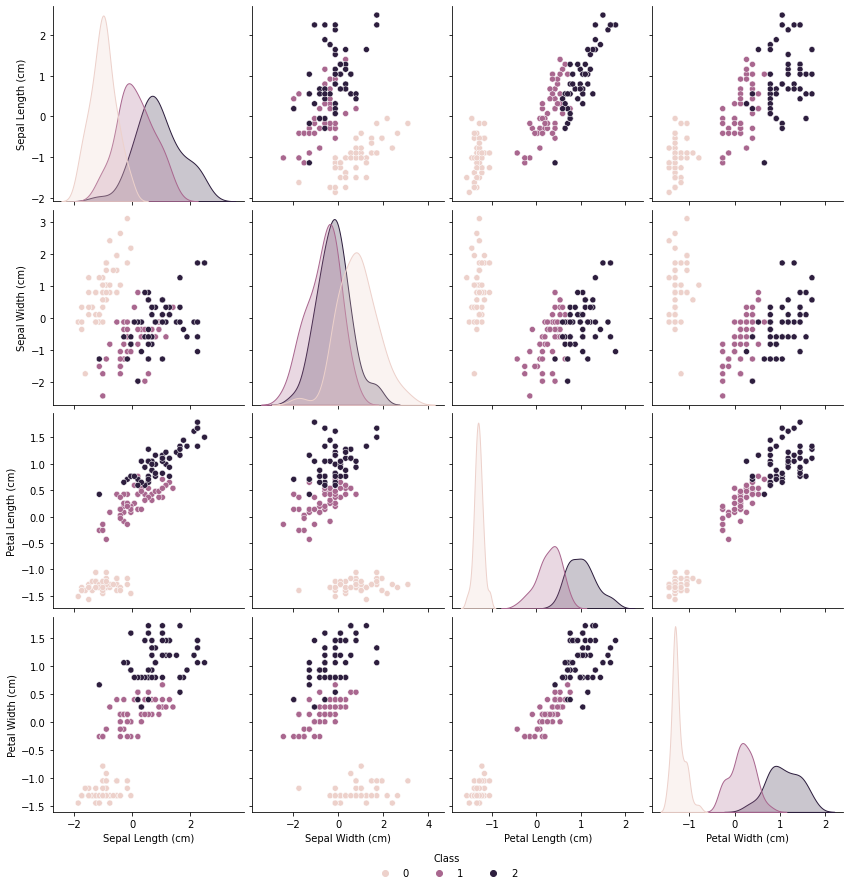

In [49]:
plt.figure(figsize=(12,12))
g = sns.pairplot(data=iris, hue="Class", size=3)
sns.move_legend(g, "lower center", bbox_to_anchor=(0.5, -0.035), ncol=3, title='Class', frameon=False)

For this example, we are going to use K-Means Clustering.

This is a distance-based algorithm.

In K-Means Clustering, k (any random whole number) data points can be assigned as a centroid. All other points are then assigned to the cluster of the closest centroid based on distance. At this point, the centroids of the clusters are recomputed.

This exercise is performed in a loop to find updated cluster centers and allocate each observation.

Learn more about K-Means Clustering and other types of clustering methods here: https://scikit-learn.org/stable/modules/clustering.html#k-means

Learn more about how to use K-Means Clustering function here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Now, let's import KMeans.

In [50]:
from sklearn.cluster import KMeans

Next, we want to find the optimum number of clusters for k-means classification. The KMeans algorithm clusters data by minimizing what is known as the inertia (the within-cluster sum-of-squares). 

To find the optimum number of clusters, we must first calculate the within-cluster sum-of-squares. We do this using only the features. 

For this to work, our feature data must be in array form. 

In [51]:
feat_array = standardized_data.values

In [52]:
wcss = []

for k in range(1, 11): # sets k in the range of 1 - 11
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42) 
    kmeans.fit(feat_array)
    wcss.append(kmeans.inertia_)

# max_iter is the number of iterations of the k-means algorithm in a single run (number of times the centroid is recomputed)
# the n_init is the number of times the k-means algorithm is run with different centroid seeds

We then use something known as the elbow method to determine the optimal number of clusters for k-means clustering. 

Here, we know that there should be three clusters, but otherwise we pick the 'elbow' of the curve as the optimum number of clusters, i.e. where adding another cluster does not allow for much better modelling of the data.

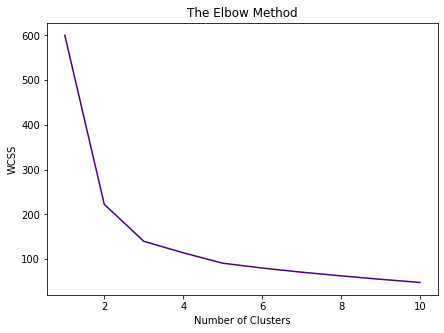

In [53]:
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, color='indigo')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Now we've found the optimum number of clusters, we can implement K-Means clustering.

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(feat_array) # predict the cluster index of each sample

We can then visualise the clusters.

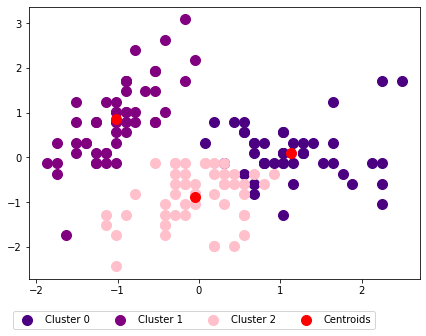

In [55]:
fig,axes = plt.subplots(figsize=(7,5))

# visualising the clusters 
plt.scatter(feat_array[y_kmeans == 0, 0], feat_array[y_kmeans == 0, 1], s = 100, c = 'indigo', label = 'Cluster 0')
plt.scatter(feat_array[y_kmeans == 1, 0], feat_array[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(feat_array[y_kmeans == 2, 0], feat_array[y_kmeans == 2, 1], s = 100, c = 'pink', label = 'Cluster 2')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

# plots legend outside of the grid, bottom centre of the figure
plt.legend(ncol = 4, bbox_to_anchor=(0.9, -0.1))

From this point, there are two avenues we can explore.

Improving our model by running a dimensionality algorithm such as Principal Component Analysis (PCA) prior to applying the clustering algorithm. Such an approach reduces the number of dimensions by deriving a select number of feature variables, meaning we can visualize the dataset in fewer dimensions, leading to an interpretation to determine if different groups are well-separated.

However, as the newly created feature variables aren't directly comparable to the original feature variables, while running a PCA can help us, it doesn't help to communicate our findings to others.

It is very important for us to be able to describe our results, so the remainder of this tutorial will focus on explaining our algorithm. 

But if you'd like to learn more about PCA, this article provides a good overview (with examples): https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 

So, we want to understand how our samples cluster, and the easiest way to do this is to use the mean of their characteristics.

For these next visualisations, we need to install and import plotly, an open-source plotting library in python.

Learn more here: https://plotly.com

In [56]:
!pip install --user plotly -U

In [57]:
import plotly as plotly
import plotly.express as px

Now, we want to visualise the mean of each feature variable by cluster.

In [58]:
kmeans.fit(feat_array) # fit the model 
clusters = standardized_data.copy()
clusters['Cluster'] = kmeans.labels_ # assigns cluster labels to features
polar = clusters.groupby("Cluster").mean().reset_index() # finds the mean of each feature variable by cluster
polar = pd.melt(polar, id_vars=["Cluster"])
fig = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True, height=400, width=700, color_discrete_sequence=['darkviolet','deeppink','orchid'], template="plotly_dark")
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.05,
    xanchor="right",
    x=1.05
))
fig.show()

/Users/nanfletcher-lloyd/.local/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
/Users/nanfletcher-lloyd/.local/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
/Users/nanfletcher-lloyd/.local/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])


It's also useful to be able to visualise how many samples are in each cluster. 

In [59]:
pie = clusters.groupby('Cluster').size().reset_index()
pie.columns=['Cluster','Value']
fig = px.pie(pie, values='Value', names='Cluster', color='Cluster', category_orders={"Cluster": ["0", "1", "2"]}, height=400, width=700, color_discrete_sequence=['darkviolet','deeppink','orchid'], template="plotly_dark")
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.05,
    xanchor="right",
    x=1.05
))
fig.show()


From these plots, we can understand the characteristics of each cluster of irises. 

For example, if you look at Cluster 1, you can understand that the petal width, petal length, and sepal length of these irises were much smaller than in the other two clusters but that they're sepal width was a lot larger.

Clusters 0 and 2 have a similar shape, with Cluster 0 having consistently larger measurements than Cluster 2.

Finally, you can apply names to your clusters based on these characteristics.

- Cluster 0 is "the common irises"/"the large irises"
- Cluster 1 is "the wide sepal irises"
- Cluster 2 is "the small irises"/"the common irises"

And that's it! You've learnt the basics of clustering.

Now you've finished this tutorial, follow the instructions and complete the assessment.